# Feed Forward Neural Networks - Q10 with MNIST data set


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

## WandB

Install and login to your wandb account to get the reports

In [2]:
!pip install wandb -qqq
import wandb

In [3]:
# Log in to your W&B account
!wandb login

wandb: Currently logged in as: deeplearningcs6910 (use `wandb login --relogin` to force relogin)


## Importing the dataset

Downloading datas from keras as mentioned in Q1

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
labels = np.unique(y_train)

## Global variables

In [6]:
training_examples = X_train.shape[0]
test_examples = X_test.shape[0]
best_thetas = {}
best_accuracy = -1

In [7]:
# loss_function = 'cross_entropy' #1 = cross entropy, 2 = mean squared error loss
# learning_rate = 0.0001 #nesterov - 0.0000001  #tanh =  0.0001 #relu = 0.0001 #signmd = 0.001
# no_hidden_layers = 1
# size_hidden = 128
# # layer_sizes = [784,128,10]
# optimizer = 6 #{1 = vanilla GD, 2 = ..}
# epochs = 20
# weight_decay = 0.05
# batch_size = 1000
# activation = 3 #{1 = sgd, 2 = tanh, 3 = relu}
# wt_init = 1 #{1 = random, 2 = xavier}
# layer_sizes = []



In [8]:
loss_function = ''
learning_rate = ''
no_hidden_layers = ''
size_hidden1 = -1
size_hidden2 = -1
size_hidden3 = -1
size_hidden4 = -1
size_hidden5 = -1
optimizer = '' 
epochs = -1
weight_decay = -1
batch_size = -1
activation = '' #{1 = sgd, 2 = tanh, 3 = relu}
wt_init = '' #{1 = random, 2 = xavier}
layer_sizes = []

In [9]:
#Added by Harsha
gamma = 0.9
beta = 0.9
epsilon = 0.00000001
beta1 = 0.9
beta2 = 0.99

In [10]:
#global dictionaries for Optimizers

#update dictionaries for momentum gradient descent
mgd_w_update = {}
mgd_b_update = {}

#update dictionaries for Nesterov Accelerated gradient Descent
nagd_w_update = {}
nagd_b_update = {}

#update dictionaries for rmsprop
rmsprop_w_vt = {}
rmsprop_b_vt = {}

#update dictionaries for adam
adam_w_mt = {}
adam_b_mt = {}
adam_w_vt = {}
adam_b_vt = {}

#update dictionaries for nadam
nadam_w_mt = {}
nadam_b_mt = {}
nadam_w_vt = {}
nadam_b_vt = {}

In [11]:
np.random.seed(1)

## Flatten Dataset

Given data is (tr_ex x 28 x 28) feature matrix. Flattening it to 2 dimension and making the feature matrix (tr_ex x 784)

### Train set


In [12]:
X_train_flat = X_train.flatten()
X_train_flat = X_train_flat.reshape(60000,784)

### Test set

In [13]:
X_test_flat = X_test.flatten()
X_test_flat = X_test_flat.reshape(10000,784)

## Splitting dataset for cross validation

Splitting the training data into training set and the validation set.\\
Taking 10% training data as cross validation set.

In [14]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train_flat, y_train, test_size = 0.1, random_state = 1)

In [15]:
training_examples_cv = X_cv_train.shape[0]

## Normalization


Normalizing feature set to have zero mean and unit variance

In [16]:
X_cv_train = X_cv_train - X_cv_train.mean()
X_cv_train = X_cv_train / X_cv_train.std()

X_cv_test = X_cv_test - X_cv_test.mean()
X_cv_test = X_cv_test / X_cv_test.std()

X_test_flat = X_test_flat - X_test_flat.mean()
X_test_flat = X_test_flat / X_test_flat.std()

## Transforming Y into One hot vectors

Given data is for multi-class classification. \\
Expressing the output layer as a one hot vector of the 10 output labels possible.

In [17]:
def transform(y):
  x = np.zeros(shape = (y.shape[0],10))
  for i in range(y.shape[0]):
    x[i][y[i]] = 1
  return x

In [18]:
y_cv_train_transformed = transform(y_cv_train)

In [19]:
y_cv_test_transformed = transform(y_cv_test)

In [20]:
y_test_transformed = transform(y_test)

## ***Visualise data***

### Visualise training data (add title)

Visualising training data on python output

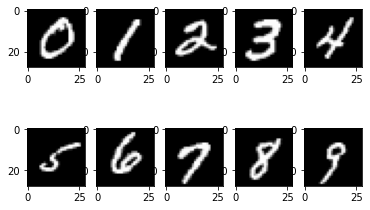

In [21]:
j = 0
image = plt.subplot()
for i in range(1000):
  if (y_train[i] == j):
    plt.subplot(2,5, 1 + j)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    j = j + 1
  if(j == 10):
    break
# show the figure
plt.show()

Visualising training data on wandb

###Visualise Test data


Visualising test data on python output

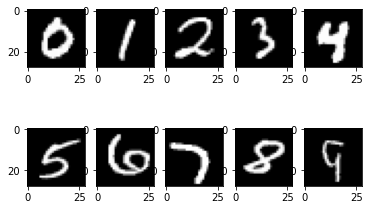

In [22]:
j = 0
for i in range(1000):
  if (y_test[i] == j):
    plt.subplot(2,5, 1 + j)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    j = j + 1
  if(j == 10):
    break
# show the figure
plt.show()

Visualising test data on wandb

## ***Error Functions***

### Choose Loss function

In [23]:
def choose_loss_func(y_pred, y, thetas):
  if (loss_function == 'cross_entropy'):
    return cross_entropy(y, y_pred, thetas)
  if (loss_function == 'mse'):
    return mse(y,y_pred, thetas)

### Least Square Error

In [24]:
def mse(Y, Y_predicted, thetas):
  layers = len(thetas)//2
  cost = np.sum((Y - Y_predicted)**2) / len(Y) + (weight_decay*0.5 * (np.sum([np.linalg.norm(thetas['W'+str(i)]) for i in range(1, layers+1)])))
  return cost

### Cross Entropy

In [25]:
def cross_entropy(Y, Y_predicted, thetas):
  layers = len(thetas)//2
  cost = log_loss(Y, Y_predicted) + (weight_decay*0.5 * (np.sum([np.linalg.norm(thetas['W'+str(i)]) for i in range(1, layers+1)])))
  return cost

## ***Activation Functions***

### Choose Activation

In [26]:
def choose_activation(X):
  if (activation == 'sigmoid'):
    return sigmoid(X)
  if (activation == 'tanh'):
    return tanh(X)
  if (activation == 'relu'):
    return relu(X)

### Sigmoid Function

$sigmoid(x) = \frac{1}{1+e^{-x}}$

In [27]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

### Tanh Function

$tanh (x) = \frac{e^x – e^{-x}}{e^x + e^{-x}}$




In [28]:
def tanh(X):
  return (np.exp(X) - np.exp(-X))/ (np.exp(X) + np.exp(-X)) #np.tanh(X)

### ReLU Function

relu(x) = max(0,x)

In [29]:
def relu(X):
  return np.maximum(0,X)

### Softmax function

$softmax(x) = \frac{e^x}{\sum_i e^{x_i}}$

In [30]:
def softmax(X):
  return np.exp(X) / np.sum(np.exp(X), axis=0)

## ***Derivatives of Activations***

### Choose derivative of activation

In [31]:
def choose_der_activation(X):
  if (activation == 'sigmoid'):
    return der_sigmoid(X)
  if (activation == 'tanh'):
    return der_tanh(X)
  if (activation == 'relu'):
    return der_relu(X)

### Sigmoid derivative

f(x) = sigmoid(x) \\
f'(x) = sigmoid(x) * (1 - sigmoid(x))

In [32]:
def der_sigmoid(X):
  return np.multiply(sigmoid(X), (1.0 - sigmoid(X)))

### Tanh derivative

f(x) = tanh(x) \\
f'(x) = $1 - tanh^2(x) $

In [33]:
def der_tanh(X):
  return 1 - np.multiply(tanh(X), tanh(X))

### ReLU derivative

f(x) = relu(x) \\
f'(x) = 1 if x>=0 \\
      = 0 otherwise

In [34]:
def der_relu(X):
  return np.where(X >=0, 1, 0)

## ***Q3 - Optimizers***

### Reset global dictionaries

In [35]:
def reset_optimizer_update_dictionaries():
    global mgd_w_update
    global mgd_b_update
    
    global nagd_w_update
    global nagd_b_update
    
    global rmsprop_w_vt
    global rmsprop_b_vt
    
    global adam_w_mt
    global adam_b_mt
    global adam_w_vt
    global adam_b_vt
    
    global nadam_w_mt
    global nadam_b_mt
    global nadam_w_vt
    global nadam_b_vt
    
    mgd_w_update = {}
    mgd_b_update = {}
    
    nagd_w_update = {}
    nagd_b_update = {}
    
    rmsprop_w_vt = {}
    rmsprop_b_vt = {}
    
    adam_w_mt = {}
    adam_b_mt = {}
    adam_w_vt = {}
    adam_b_vt = {}
    
    nadam_w_mt = {}
    nadam_b_mt = {}
    nadam_w_vt = {}
    nadam_b_vt = {}

### Vanilla Gradient Descent (Used for SGD as well)

Update rule: \\
$θ = θ - η * ∇ θ$

In [36]:
def gradient_descent(thetas, grads): #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(thetas)//2
    thetas_updated = {}
    for i in range(1,layers+1):
        thetas_updated['W' + str(i)] = thetas['W' + str(i)] - learning_rate * grads['W' + str(i)]
        thetas_updated['B' + str(i)] = thetas['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return thetas_updated

### Momentum based Gradient Descent

Update Rule: \\
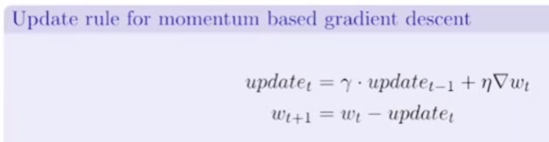

In [37]:
def momentum_gradient_descent(thetas, grads, epoch_counter, step_counter):
  global mgd_w_update  
  global mgd_b_update
    
  layers = len(thetas)//2
  thetas_updated = {}
    

  if(epoch_counter == 0 and step_counter == 0):
    for i in range(1,layers+1):
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - learning_rate * grads['W' + str(i)]
      mgd_w_update[i] = learning_rate * grads['W' + str(i)]
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - learning_rate * grads['B' + str(i)]
      mgd_b_update[i] = learning_rate * grads['B' + str(i)]
  else:
    for i in range(1,layers+1):
       thetas_updated['W' + str(i)] = thetas['W' + str(i)] - ((gamma * mgd_w_update[i] )+(learning_rate * grads['W' + str(i)]))
       mgd_w_update[i] = (gamma * mgd_w_update[i] )+(learning_rate * grads['W' + str(i)])
       thetas_updated['B' + str(i)] = thetas['B' + str(i)] - ((gamma * mgd_b_update[i] )+(learning_rate * grads['B' + str(i)]))
       mgd_b_update[i] = (gamma * mgd_b_update[i] )+(learning_rate * grads['B' + str(i)])
  
  return thetas_updated



### Nesterov Accelerated Gradient Descent

Update Rule: \\

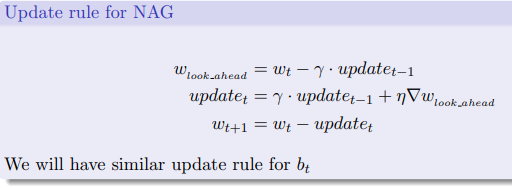

In [38]:
def nesterov_accelerated_gradient_descent(thetas, grads, epoch_counter, step_counter, X, Y):
    
  global nagd_w_update
  global nagd_b_update

  layers = len(thetas)//2
  thetas_updated = {}
  thetas_look_ahead = {}

  if(epoch_counter != 0 or step_counter != 0):
    for i in range(1,layers+1):
      thetas_look_ahead['W' + str(i)] = thetas['W' + str(i)] - ((gamma * nagd_w_update[i] )) 
      thetas_look_ahead['B' + str(i)] = thetas['B' + str(i)] - ((gamma * nagd_b_update[i] ))
    values_step = forward_propagation(X.T, thetas_look_ahead)
    grads = backward_propagation(thetas_look_ahead, values_step, X.T, Y.T)
    for i in range(1,layers+1):
      nagd_w_update[i] = (gamma * nagd_w_update[i] )+(learning_rate * grads['W' + str(i)])
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - nagd_w_update[i]
      nagd_b_update[i] = (gamma * nagd_b_update[i] )+(learning_rate * grads['B' + str(i)])
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - nagd_b_update[i]

  if(epoch_counter == 0 and step_counter == 0):
    for i in range(1,layers+1):
      nagd_w_update[i] = learning_rate * grads['W' + str(i)]
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - nagd_w_update[i]
      nagd_b_update[i] = learning_rate * grads['B' + str(i)]    
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - nagd_b_update[i]
  
  return thetas_updated


### RMSProp 

Update rule: \\

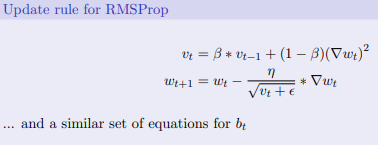

In [39]:
def rmsprop(thetas, grads, epoch_counter, step_counter):
  global rmsprop_w_vt
  global rmsprop_b_vt

  layers = len(thetas)//2
  thetas_updated = {}

  if(epoch_counter != 0 or step_counter != 0):
    for i in range(1,layers+1):
      rmsprop_w_vt[i] = beta * rmsprop_w_vt[i] + (1-beta) * np.power(grads['W' + str(i)],2)
      rmsprop_b_vt[i] = beta * rmsprop_b_vt[i] + (1-beta) * np.power(grads['B' + str(i)],2)
      w = 1/np.power(rmsprop_w_vt[i]+epsilon,0.5)
      b = 1/np.power(rmsprop_b_vt[i]+epsilon,0.5)
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - learning_rate * w * grads['W' + str(i)]
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - learning_rate * b * grads['B' + str(i)]
  else:
    for i in range(1,layers+1):
      rmsprop_w_vt[i] =  (1-beta) *  np.power(grads['W' + str(i)],2)
      rmsprop_b_vt[i] = (1-beta) * np.power(grads['B' + str(i)],2)
      w = 1/np.power(rmsprop_w_vt[i]+epsilon,0.5)
      b = 1/np.power(rmsprop_b_vt[i]+epsilon,0.5)
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - learning_rate * w * grads['W' + str(i)]
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - learning_rate * b * grads['B' + str(i)]
  
  return thetas_updated



### Adam

Update rules: \\

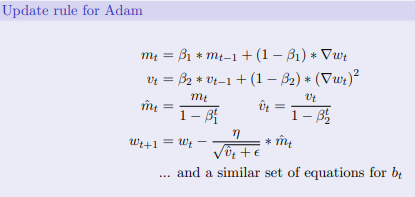

In [40]:
def adam(thetas, grads, epoch_counter, step_counter, steps):

  global adam_w_mt
  global adam_b_mt
  global adam_w_vt
  global adam_b_vt


  layers = len(thetas)//2
  thetas_updated = {}

  if(epoch_counter != 0 or step_counter != 0):
    for i in range(1,layers+1):
      adam_w_mt[i] = beta1 * adam_w_mt[i] + (1-beta1) * grads['W' + str(i)]
      adam_b_mt[i] = beta1 * adam_b_mt[i] + (1-beta1) * grads['B' + str(i)]
      adam_w_vt[i] = beta2 * adam_w_vt[i] + (1-beta2) * np.power(grads['W' + str(i)],2)
      adam_b_vt[i] = beta2 * adam_b_vt[i] + (1-beta2) * np.power(grads['B' + str(i)],2)
      wmt_hat = adam_w_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      wvt_hat = adam_w_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      bmt_hat = adam_b_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      bvt_hat = adam_b_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - (learning_rate *(1/np.sqrt(wvt_hat+epsilon))* wmt_hat)
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - (learning_rate *(1/np.sqrt(bvt_hat+epsilon))* bmt_hat)
  else:
    for i in range(1,layers+1):
      adam_w_mt[i]=  (1-beta1) * grads['W' + str(i)]
      adam_b_mt[i] = (1-beta1) * grads['B' + str(i)]
      adam_w_vt[i]=  (1-beta2) * np.power(grads['W' + str(i)],2)
      adam_b_vt[i] = (1-beta2) * np.power(grads['B' + str(i)],2)
      wmt_hat = adam_w_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      wvt_hat = adam_w_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      bmt_hat = adam_b_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      bvt_hat = adam_b_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - (learning_rate *(1/np.sqrt(wvt_hat+epsilon))* wmt_hat)
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - (learning_rate *(1/np.sqrt(bvt_hat+epsilon))* bmt_hat)

  return thetas_updated



### Nadam

In [41]:
def nadam(thetas, grads, epoch_counter, step_counter, steps, X, Y):

  global nadam_w_mt
  global nadam_b_mt
  global nadam_w_vt
  global nadam_b_vt
    
  layers = len(thetas)//2
  thetas_updated = {}
  thetas_look_ahead = {}

  if(epoch_counter != 0 or step_counter != 0):
    for i in range(1,layers+1):
      nadam_w_mt[i] = beta1 * nadam_w_mt[i]
      nadam_b_mt[i] = beta1 * nadam_b_mt[i]
      nadam_w_vt[i] = beta2 * nadam_w_vt[i]
      nadam_b_vt[i] = beta2 * nadam_b_vt[i]
      wmt_hat = nadam_w_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      wvt_hat = nadam_w_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      bmt_hat = nadam_b_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      bvt_hat = nadam_b_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      thetas_look_ahead['W' + str(i)] = thetas['W' + str(i)] - (learning_rate *(1/np.sqrt(wvt_hat+epsilon))* wmt_hat)
      thetas_look_ahead['B' + str(i)] = thetas['B' + str(i)] - (learning_rate *(1/np.sqrt(bvt_hat+epsilon))* bmt_hat)
    values_step = forward_propagation(X.T, thetas_look_ahead)
    grads = backward_propagation(thetas_look_ahead, values_step, X.T, Y.T)
    for i in range(1,layers+1):
      nadam_w_mt[i] += (1-beta1) * grads['W' + str(i)]
      nadam_b_mt[i] += (1-beta1) * grads['B' + str(i)]
      nadam_w_vt[i] += (1-beta2) * np.power(grads['W' + str(i)],2)
      nadam_b_vt[i] += (1-beta2) * np.power(grads['B' + str(i)],2)
      wmt_hat = nadam_w_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      wvt_hat = nadam_w_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      bmt_hat = nadam_b_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      bvt_hat = nadam_b_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - (learning_rate *(1/np.sqrt(wvt_hat+epsilon))* wmt_hat)
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - (learning_rate *(1/np.sqrt(bvt_hat+epsilon))* bmt_hat)
  else:
    for i in range(1,layers+1):
      nadam_w_mt[i]=  (1-beta1) * grads['W' + str(i)]
      nadam_b_mt[i] = (1-beta1) * grads['B' + str(i)]
      nadam_w_vt[i]=  (1-beta2) * np.power(grads['W' + str(i)],2)
      nadam_b_vt[i] = (1-beta2) * np.power(grads['B' + str(i)],2)
      wmt_hat = nadam_w_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      wvt_hat = nadam_w_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      bmt_hat = nadam_b_mt[i]/(1-np.power(beta1,(epoch_counter*steps)+step_counter+1))
      bvt_hat = nadam_b_vt[i]/(1-np.power(beta2,(epoch_counter*steps)+step_counter+1))
      thetas_updated['W' + str(i)] = thetas['W' + str(i)] - (learning_rate *(1/np.sqrt(wvt_hat+epsilon))* wmt_hat)
      thetas_updated['B' + str(i)] = thetas['B' + str(i)] - (learning_rate *(1/np.sqrt(bvt_hat+epsilon))* bmt_hat)

  return thetas_updated

## ***Initialize parameters***

### Random Weight Initialization

Initializing the weights with random weights

In [42]:
def init():
  thetas = {}
  for i in range (1, len(layer_sizes)):
    thetas['W'+ str(i)] = np.random.rand(layer_sizes[i], layer_sizes[i-1]) - 0.5
    thetas['B'+ str(i)] = np.random.rand(layer_sizes[i], 1) - 0.5
  return thetas

### Xavier Weight Initialization

The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing. \\
$W^l_{i,j} = \eta (0, \frac {1} {n^{l - 1}})$

In [43]:
def xavier_init():
  thetas = {}

  for i in range (1, len(layer_sizes)):
    boundary = np.sqrt(6/(layer_sizes[i] + layer_sizes[i-1]))

    thetas['W'+ str(i)] = np.random.uniform(low = -boundary, high = boundary, size = (layer_sizes[i], layer_sizes[i-1]))
    thetas['B'+ str(i)] = np.random.randn(layer_sizes[i], 1)*0.01
  return thetas

## ***Building a neural network on the Training set***

### Choose Initialization

In [44]:
def choose_init():
  if (wt_init == 'random'):
    return init()
  if (wt_init == 'xavier'):
    return xavier_init()

### ***Q2 - Forward propagation***

In [45]:
def forward_propagation(X, thetas):
    layers = len(thetas)//2
    values = {} #dictionary containining the numpy arrays of activations of all layers
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(thetas['W' + str(i)], X) + thetas['B' + str(i)]
            values['A' + str(i)] = choose_activation(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(thetas['W' + str(i)], values['A' + str(i-1)]) + thetas['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = softmax(values['Z' + str(i)])
            else:
                values['A' + str(i)] = choose_activation(values['Z' + str(i)])
    return values

### Compute cost

In [46]:
def compute_cost(values, Y, thetas): #takes true values and dictionary having activations of all layers as input and returns cost
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    # cost = 1/(2*len(Y)) * np.sum(np.square(Y_pred - Y))
    cost = choose_loss_func(Y_pred, Y, thetas)
    return cost

### ***Q3 - Backward Propagation Implementation***
### Choose dZ for Backprop

In [47]:
def choose_dZ(m, y_pred, y):
  if (loss_function == 'cross_entropy'):
    return (y_pred - y)
  if (loss_function == 'mse'):
    return (y_pred - y) * (y_pred) * (1-y_pred)

### Back propagation

In [48]:
def backward_propagation(thetas, values, X, Y): #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(thetas)//2
    m = len(Y)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dZ = choose_dZ(m, values['A' + str(i)], Y)
        else:
            dA = np.dot(thetas['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, choose_der_activation(values['Z' + str(i)])) 
        if i==1:
            grads['W' + str(i)] = np.dot(dZ, X.T) + weight_decay * thetas['W' + str(i)]
            grads['B' + str(i)] = np.sum(dZ, axis=1, keepdims=True) 
        else:
            grads['W' + str(i)] = np.dot(dZ,values['A' + str(i-1)].T) + weight_decay * thetas['W' + str(i)]
            grads['B' + str(i)] = np.sum(dZ, axis=1, keepdims=True)
    return grads

### Choose GD

In [49]:
def choose_gd(thetas, grads, epoch_counter, step_counter, X, Y, steps):
  if (optimizer == 'sgd'):
    return gradient_descent(thetas, grads)
  if(optimizer == 'momentum'):
    return momentum_gradient_descent(thetas, grads, epoch_counter, step_counter)
  if (optimizer == 'nag'):
    return nesterov_accelerated_gradient_descent(thetas, grads, epoch_counter, step_counter, X, Y)
  if(optimizer == 'rmsprop'):
    return rmsprop(thetas, grads, epoch_counter, step_counter)
  if(optimizer == 'adam'):
    return adam(thetas, grads, epoch_counter, step_counter, steps)
  if(optimizer == 'nadam'):
    return nadam(thetas, grads, epoch_counter, step_counter, steps, X, Y)

### Neural Network model 

In [50]:
def model(X, Y, training_examples): #trains the model
    thetas = choose_init()

    steps = (training_examples//batch_size)
    if(training_examples % batch_size != 0):
      steps = steps+1
    reset_optimizer_update_dictionaries()
    for i in range(epochs):
      for j in range(steps):
        X_step = X[j*batch_size : j*batch_size + batch_size]
        Y_step = Y[j*batch_size : j*batch_size + batch_size]
        values_step = forward_propagation(X_step.T, thetas)
        grads = backward_propagation(thetas, values_step, X_step.T, Y_step.T)
        thetas = choose_gd(thetas, grads, i, j, X, Y, steps)
        cost = compute_cost(values_step, Y_step.T, thetas)
        # print(i, cost)

      evaluate_perf(thetas, i)      

    return thetas

## Predicting the results

In [51]:
def predict(X, thetas):  #predict on new array X given learnt parameters
    values = forward_propagation(X.T, thetas)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

## Accuracy

In [52]:
def accuracy(y_pred, y):
  y_pred=np.argmax(y_pred, axis=1)
  y = np.argmax(y, axis=1)
  accuracy = accuracy_score(y, y_pred)
  return accuracy

## Evaluate Performance

In [53]:
def evaluate_perf(thetas, epochs):
  y_pred_train = predict(X_cv_train, thetas)
  y_pred_cv_test = predict(X_cv_test, thetas)
  y_pred_test = predict(X_test_flat, thetas)

  accuracy_train = accuracy(y_pred_train, y_cv_train_transformed) 
  accuracy_cv_test = accuracy(y_pred_cv_test, y_cv_test_transformed)
  accuracy_test = accuracy(y_pred_test, y_test_transformed)

  loss_train = choose_loss_func(y_pred_train, y_cv_train_transformed, thetas)
  loss_cv_test = choose_loss_func(y_pred_cv_test, y_cv_test_transformed, thetas)
  loss_test = choose_loss_func(y_pred_test, y_test_transformed, thetas)

  logging(accuracy_train, accuracy_cv_test, accuracy_test, loss_train, loss_cv_test, loss_test, epochs)

## WandB Logs

In [54]:
def logging(accuracy_train, accuracy_cv_test, accuracy_test, loss_train, loss_cv_test, loss_test, epochs):
    wandb.log({
      "epochs": epochs,
      "accuracy_train": accuracy_train,
      "accuracy_cv_test": accuracy_cv_test,
      "accuracy_test": accuracy_test,
      "loss_train": loss_train,
      "loss_cv_test": loss_cv_test,
      "loss_test": loss_test})

## Train WandB

In [55]:
def train():
  run = wandb.init(project="test-project", entity="deeplearningcs6910", config = wandb.config, magic=True, reinit = True)
  wandb.run.name = 'bs-'+str(wandb.config.batch_size)+'-lr-'+ str(wandb.config.learning_rate)+'-ep-'+str(wandb.config.epochs)+ '-op-'+str(wandb.config.optimizer)+ '-act-'+str(wandb.config.activation)+'-wd-'+str(wandb.config.weight_decay)+'-wi-'+str(wandb.config.wt_init) + '-nhl-'+str(wandb.config.no_hidden_layers)+'-shl1-'+str(wandb.config.size_hidden1)+'-shl2-'+str(wandb.config.size_hidden2)+'-shl3-'+str(wandb.config.size_hidden3)
  if(wandb.config.no_hidden_layers >3):
    wandb.run.name = wandb.run.name + '-shl4-'+str(wandb.config.size_hidden4)
  
  if(wandb.config.no_hidden_layers == 5):
    wandb.run.name = wandb.run.name + '-shl5-'+str(wandb.config.size_hidden5)

  wandb.run.name = wandb.run.name + '-lf-'+ str(wandb.config.loss_function)
  
  # global batch_size

  global learning_rate 
  global no_hidden_layers
  global size_hidden
  global optimizer
  global epochs
  global weight_decay
  global batch_size
  global activation
  global wt_init
  global loss_function

  batch_size = wandb.config.batch_size 
  learning_rate = wandb.config.learning_rate 
  epochs = wandb.config.epochs 
  optimizer = wandb.config.optimizer 
  no_hidden_layers = wandb.config.no_hidden_layers 
  # size_hidden = wandb.config.size_hidden 
  size_hidden1 = wandb.config.size_hidden1 
  size_hidden2 = wandb.config.size_hidden2 
  size_hidden3 = wandb.config.size_hidden3 
  size_hidden4 = wandb.config.size_hidden4 
  size_hidden5 = wandb.config.size_hidden5 
  activation = wandb.config.activation 
  weight_decay = wandb.config.weight_decay
  wt_init = wandb.config.wt_init   
  loss_function = wandb.config.loss_function

#   updating layer sizes
  layer_sizes.clear()
  layer_sizes.append(784)

  layer_sizes.append(size_hidden1)
  layer_sizes.append(size_hidden2)
  layer_sizes.append(size_hidden3)

  if(no_hidden_layers >3):
    layer_sizes.append(size_hidden4)
  
  if(no_hidden_layers == 5):
    layer_sizes.append(size_hidden5)

  layer_sizes.append(10)

  #training model
  thetas = model(X_cv_train, y_cv_train_transformed, training_examples_cv) #modelling dataset

  run.finish()


## Sweep Configs

### Q10 - best hyper para on MNIST dataset

In [56]:
sweep_config = {
        'method': 'bayes',
        "name": "assignement1-Feed Forward Neural Network - Q10",
        'metric':{
            'goal': 'maximize',
            'name': 'accuracy_cv_test',
            'target': 1
        },
        'parameters': {
            'epochs': {
                'values': [5,10]
            },
            'no_hidden_layers':{
                'values': [4]
            },
            'size_hidden1':{
                'values': [128]
            },
            'size_hidden2':{
                'values': [128]
            },
            'size_hidden3':{
                'values': [128]
            },
            'size_hidden4':{
                'values': [64]
            },
            'size_hidden5':{
                'values': [128]
            },
            'learning_rate':{
                'values': [0.001]
            },
            'optimizer':{
                'values': ['momentum','adam']
            },
            'batch_size':{
                'values': [64, 128]
            },
            'activation':{
                'values': ['relu']
            },
            'weight_decay':{
                'values': [0.05]
            },
            'wt_init': {
                'values': ['xavier']
            },
            'loss_function': {
                'values': ['cross_entropy']
            }
        }
    }
    
sweep_id = wandb.sweep(sweep_config,project ='feedFwdNeuralNwkQ10')
wandb.agent(sweep_id, function=train, count  = 10)

Create sweep with ID: 6b9xwa7k
Sweep URL: https://wandb.ai/deeplearningcs6910/feedFwdNeuralNwkQ10/sweeps/6b9xwa7k


wandb: Agent Starting Run: z94f7gi6 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: Currently logged in as: deeplearningcs6910 (use `wandb login --relogin` to force relogin)
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▅▆▅▅▆▆▇▇█
accuracy_test,▁▆▇▇▆▇█▇▇█
accuracy_train,▁▅▆▇▆█▇███
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▅▄▄▃▂▂▂▁▁
loss_test,█▅▄▃▃▂▂▂▁▁
loss_train,█▅▄▃▃▂▂▂▁▁
accuracy_cv_test,0.97517
accuracy_test,0.9761
accuracy_train,0.9872
epochs,9


wandb: Agent Starting Run: txxt63pb with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▃▇█▇▆██▇█
accuracy_test,▁▄█▇█▆███▇
accuracy_train,▁▄▇▇▇▆▇██▇
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▆▄▃▂▂▂▁▁▁
loss_test,█▆▄▃▂▂▂▁▁▁
loss_train,█▆▄▃▂▂▂▁▁▁
accuracy_cv_test,0.97133
accuracy_test,0.9716
accuracy_train,0.98257
epochs,9


wandb: Agent Starting Run: 04508dkg with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: momentum
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▆▇▇▆██▇▇▇
accuracy_test,▁▆▇▇▆███▇▇
accuracy_train,▁▆▇▇▇██▇▇▇
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▄▃▂▂▁▁▁▁▁
loss_test,█▄▃▂▂▁▁▁▁▁
loss_train,█▄▃▂▂▁▁▁▁▁
accuracy_cv_test,0.9585
accuracy_test,0.966
accuracy_train,0.97337
epochs,9


wandb: Agent Starting Run: cz9n9al1 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▇█▇█
accuracy_test,▁▇▇██
accuracy_train,▁▆▇██
epochs,▁▃▅▆█
loss_cv_test,█▄▃▂▁
loss_test,█▄▃▂▁
loss_train,█▄▃▂▁
accuracy_cv_test,0.968
accuracy_test,0.9731
accuracy_train,0.98357
epochs,4


wandb: Agent Starting Run: gbu70a6r with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▅▇▇▇▇▆█▇▆
accuracy_test,▁▅█▇▆█▇█▇▇
accuracy_train,▁▅▇▇▆█▇███
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▆▄▃▃▂▂▁▁▁
loss_test,█▆▄▃▃▂▂▁▁▁
loss_train,█▆▄▃▃▂▂▁▁▁
accuracy_cv_test,0.96683
accuracy_test,0.9724
accuracy_train,0.98591
epochs,9


wandb: Agent Starting Run: u3nf1hdx with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▇███
accuracy_test,▁▆▇██
accuracy_train,▁▆▇▇█
epochs,▁▃▅▆█
loss_cv_test,█▄▃▂▁
loss_test,█▅▃▂▁
loss_train,█▅▃▂▁
accuracy_cv_test,0.96583
accuracy_test,0.9699
accuracy_train,0.98165
epochs,4


wandb: Agent Starting Run: t6ulha6s with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: momentum
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▂▁▄▆▇█▃▇▄▅
accuracy_test,▃▁▄▆██▄█▅▆
accuracy_train,▁▁▄▅▇█▄█▆▆
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▆▄▃▂▁▂▁▂▁
loss_test,█▆▄▃▂▁▂▁▁▁
loss_train,█▆▄▃▂▁▂▁▁▁
accuracy_cv_test,0.95683
accuracy_test,0.9629
accuracy_train,0.97144
epochs,9


wandb: Agent Starting Run: x4zzyrxd with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▄▇▆█
accuracy_test,▁▄█▇█
accuracy_train,▁▄▇▇█
epochs,▁▃▅▆█
loss_cv_test,█▅▃▂▁
loss_test,█▅▃▂▁
loss_train,█▅▃▂▁
accuracy_cv_test,0.96667
accuracy_test,0.9726
accuracy_train,0.9817
epochs,4


wandb: Agent Starting Run: nlnm4jn3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▅▆▇▇▆▆▇▆█
accuracy_test,▁▆▇█▇█▆▇▇█
accuracy_train,▁▆▇▇▇▇▆█▇█
epochs,▁▂▃▃▄▅▆▆▇█
loss_cv_test,█▅▄▃▂▂▂▂▁▁
loss_test,█▅▄▃▂▂▂▁▁▁
loss_train,█▅▄▃▂▂▂▁▁▁
accuracy_cv_test,0.97283
accuracy_test,0.9733
accuracy_train,0.98522
epochs,9


wandb: Agent Starting Run: cbz2r016 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	no_hidden_layers: 4
wandb: 	optimizer: momentum
wandb: 	size_hidden1: 128
wandb: 	size_hidden2: 128
wandb: 	size_hidden3: 128
wandb: 	size_hidden4: 64
wandb: 	size_hidden5: 128
wandb: 	weight_decay: 0.05
wandb: 	wt_init: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


accuracy_cv_test,▁▅▇█▆
accuracy_test,▁▄██▆
accuracy_train,▁▅██▆
epochs,▁▃▅▆█
loss_cv_test,█▄▂▁▁
loss_test,█▄▂▁▂
loss_train,█▄▂▁▁
accuracy_cv_test,0.9515
accuracy_test,0.9537
accuracy_train,0.96237
epochs,4
